<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><strong>Описание данных</strong></a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><strong>Подготовка данных</strong></a></span><ul class="toc-item"><li><span><a href="#Проверка-данных-по-эффективности-обогащения" data-toc-modified-id="Проверка-данных-по-эффективности-обогащения-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><strong>Проверка данных по эффективности обогащения</strong></a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span><strong>Предобработка данных</strong></a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><strong>Анализ данных</strong></a></span><ul class="toc-item"><li><span><a href="#Рассмотрение-концентрация-металлов" data-toc-modified-id="Рассмотрение-концентрация-металлов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span><strong>Рассмотрение концентрация металлов</strong></a></span></li><li><span><a href="#Сравнение-распределения-размеров-гранул-сырья" data-toc-modified-id="Сравнение-распределения-размеров-гранул-сырья-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span><strong>Сравнение распределения размеров гранул сырья</strong></a></span></li><li><span><a href="#Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях" data-toc-modified-id="Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span><strong>Исследование суммарной концентрации всех веществ на разных стадиях</strong></a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Создание-функции-sMAPE" data-toc-modified-id="Создание-функции-sMAPE-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span><strong>Создание функции sMAPE</strong></a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span><strong>Обучение моделей</strong></a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span><strong>Вывод</strong></a></span></li></ul></div>

# **Восстановление золота из руды**

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Необходимо:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

## **Описание данных**

Технологический процесс
- Rougher feed — исходное сырье
- Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
   - Xanthate *— ксантогенат (промотер, или активатор флотации);
   - Sulphate — сульфат (на данном производстве сульфид натрия);
   - Depressant — депрессант (силикат натрия).
- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота

Параметры этапов
- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи

Наименование признаков

Наименование признаков должно быть такое:

`[этап].[тип_параметра].[название_параметра]`

Пример: `rougher.input.feed_ag`

Возможные значения для блока `[этап]`:
- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики

Возможные значения для блока `[тип_параметра]:`
- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики

## **Подготовка данных**

In [1]:
# импортируем библиотеку pandas
import pandas as pd
# импортируем библиотеку numpy
import numpy as np
# импортируем библиотеки math
import math
# испортируем библиотеку sklearn
import sklearn
# импортируем функцию из бибилиотеки sklearn
from sklearn.model_selection import train_test_split

# импортируем метод для подобора наилучших параметров 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# импортируем метод дерева принятия решений
from sklearn.tree import DecisionTreeRegressor
# импортируем метод случайного леса
from sklearn.ensemble import RandomForestRegressor
# импортируем метод линейной регрессии
from sklearn.linear_model import LinearRegression
# импортируем среднюю абсолютную ошибку
from sklearn.metrics import mean_absolute_error
# импортируем среднюю квадратичную ошибку
from sklearn.metrics import mean_squared_error

# импортируем библиотеку plotly, с помощью которой будем строить графики
import plotly.graph_objects as go
import plotly.express as px

# добавим случайности нашей функции, чтобы каждый раз брался разный сэмпл
from numpy.random import RandomState

# импортируем cross_validate из sklearn
from sklearn.model_selection import cross_validate
# импортируем cross_validate из sklearn
from sklearn.metrics import make_scorer

# импортируем DummyRegressor
from sklearn.dummy import DummyRegressor

In [2]:
# зададим RandomState
state = RandomState(12345)

# Сброс ограничений на число столбцов и строк
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# считываем csv-файл датасета в перемнные df_full, df_test, df_train
try:
    df_full = pd.read_csv('gold_recovery_full_new.csv')
except:
    df_full = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_full_new.csv')

try:
    df_test = pd.read_csv('gold_recovery_test_new.csv')
except:
    df_test = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_test_new.csv')
    
try:
    df_train = pd.read_csv('gold_recovery_train_new.csv')
except:
    df_train = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_train_new.csv')

In [4]:
# рассмотрим данные датасета df_full
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [5]:
# посмотрим основную информацию по датасету df_full
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [6]:
# рассмотрим данные датасета df_test
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

In [7]:
# посмотрим основную информацию по датасету df_test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [8]:
# рассмотрим данные датасета df_train
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [9]:
# посмотрим основную информацию по датасету df_train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


После изучения данных можно сделать следующие **выводы**:
- В отличие от `df_full` количество столбцов в `df_test` меньше, что говорит об отсутствии в тестовой выборке таких данных как:
    - итоговые параметры по концентрации металлов после всех этапов очистки;
    - параметры по концентрации металлов после первого этапа очистки;
    - параметры по концентрации металлов после флотации;
    - расчетные параметры по реагентам на входе;
    - данные концентрации в хвостах на всех этапах.
- В тестовой выборке `df_test` отсутствуют целевые признаки `final.output.recovery` и `rougher.output.recovery`. Остальные отсутствующие численные признаки не понадобятся для обучения модели. Позже добавим целевые признаки в датасет.
- В наличии основные данные для каждого этапа обработки сырья:
    - для этапа флотации есть параметры концентрации металла до и после, параметры работы флотационных установок и расчеты реагентов к ним, данные по объему воздуха и уровню жидкости, данные по размеру гранул или фракции сырья, скорости подачи и данные по концентрации в хвостах;
    - для этапа первичной очистки есть параметры концентрации металла до и после, расчеты реагентов для этапа, данные по объему воздуха и уровню жидкости на флотационных установках и данные по концентрации в хвостах;
    - для этапа вторичной очистки есть параметры концентрации металла до и после, данные по объему воздуха и уровню жидкости на флотационных установках и данные по концентрации в хвостах
    - данные по эффективности обогащения чернового и финального концентрата.
- в датасетах имеются пропуски
- в столбце `date` неверный формат данных

### **Проверка данных по эффективности обогащения**

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между нашими расчётами и значением признака. Опишем выводы.

In [10]:
# создадим объект для заполнения его расчтеными данными
recovery_for_check = []
# создадим отдельный объект с уже известными данными по эффективности
in_df_recovery = df_train['rougher.output.recovery']

# напишем цикл переберающий все строки датасета df_train
for row in range(df_train.shape[0]):
    # создадим переменную recovery
    recovery = 0
    # f-conc - это доля золота в сырье до флотации;
    f_conc = df_train['rougher.input.feed_au'][row]
    # c-conc - это доля золота в концентрате после флотации;
    c_conc = df_train['rougher.output.concentrate_au'][row]
    # t-conc - это доля золота в отвальных хвостах после флотации.
    t_conc = df_train['rougher.output.tail_au'][row]
    # рассчитаем recovery
    recovery = ((c_conc * (f_conc - t_conc))/(f_conc * (c_conc - t_conc)))*100
    # применим условие, что при recovery=0 или меньше 0, то заполняем данные значением NaN 
    # в ином случае добавляем значение в recovery_for_check
    if not (math.isnan(recovery) or (recovery < 0)):
        recovery_for_check.append(recovery)
    else:
        recovery_for_check.append(math.nan)
        in_df_recovery.loc[row] = math.nan
        
# подготовим данные в recovery_for_check для расчета MAE
# преобразуем объект recovery_for_check в объект типа Series
recovery_for_check = pd.Series(recovery_for_check)
# удалим пропуски
recovery_for_check.dropna(inplace=True)
# сбросим индексы
recovery_for_check.reset_index(inplace=True, drop = True)
# подготовим данные в in_df_recovery для расчета MAE
# удалим пропуски
in_df_recovery.dropna(inplace=True)
# сбросим индексы
in_df_recovery.reset_index(inplace=True, drop = True)
# рассчитаем MAE и выведим на экран
print('MAE:',mean_absolute_error(recovery_for_check, in_df_recovery))

MAE: 9.73512347450521e-15


**Вывод**

Значение MAE очень мало, что можно считать, что данные в столбце `rougher.output.recovery` рассчитаны правильно. Оно не равно нулю, т.к. это возможно связано с округлением расчетных данных, примененных при расчете.

### **Предобработка данных**

Заполним пропуски в датасетах методом .ffill, он отлично подходит в случаях когда соседние по времени параметры часто похожи, согласно условий задачи. Но сначала сделаем индексами в каждом датасете столбец `date`, что позволит гибко и просто использовать индексы

In [11]:
# поменяем тип данных в столбце date 2019-03-07T00:00:00
df_full['date'] = pd.to_datetime(df_full['date'], format='%Y-%m-%dT%H:%M:%S')
df_test['date'] = pd.to_datetime(df_full['date'], format='%Y-%m-%dT%H:%M:%S')
df_train['date'] = pd.to_datetime(df_full['date'], format='%Y-%m-%dT%H:%M:%S')
# в каждом датасете используем set_index для перевода 'date' в разряд индексов
df_full.set_index('date', drop=True, inplace=True)
df_test.set_index('date', drop=True, inplace=True)
df_train.set_index('date', drop=True, inplace=True)

In [12]:
# проверим, что получилось
df_train.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.

In [13]:
# обработаем пропуски в датасетах
df_full.ffill(axis=0,inplace=True)
df_test.ffill(axis=0,inplace=True)
df_train.ffill(axis=0,inplace=True)

Проверим заполнение пропусков 

In [14]:
#посчитаем количество ожиадаемах пропусков в каждом столбце
df_full.isna().sum()

final.output.concentrate_ag                           0
final.output.concentrate_pb                           0
final.output.concentrate_sol                          0
final.output.concentrate_au                           0
final.output.recovery                                 0
final.output.tail_ag                                  0
final.output.tail_pb                                  0
final.output.tail_sol                                 0
final.output.tail_au                                  0
primary_cleaner.input.sulfate                         0
primary_cleaner.input.depressant                      0
primary_cleaner.input.feed_size                       0
primary_cleaner.input.xanthate                        0
primary_cleaner.output.concentrate_ag                 0
primary_cleaner.output.concentrate_pb                 0
primary_cleaner.output.concentrate_sol                0
primary_cleaner.output.concentrate_au                 0
primary_cleaner.output.tail_ag                  

In [15]:
#посчитаем количество ожиадаемах пропусков в каждом столбце
df_test.isna().sum()

primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.input.floatbank11_sulfate       

In [16]:
#посчитаем количество ожиадаемах пропусков в каждом столбце
df_train.isna().sum()

final.output.concentrate_ag                           0
final.output.concentrate_pb                           0
final.output.concentrate_sol                          0
final.output.concentrate_au                           0
final.output.recovery                                 0
final.output.tail_ag                                  0
final.output.tail_pb                                  0
final.output.tail_sol                                 0
final.output.tail_au                                  0
primary_cleaner.input.sulfate                         0
primary_cleaner.input.depressant                      0
primary_cleaner.input.feed_size                       0
primary_cleaner.input.xanthate                        0
primary_cleaner.output.concentrate_ag                 0
primary_cleaner.output.concentrate_pb                 0
primary_cleaner.output.concentrate_sol                0
primary_cleaner.output.concentrate_au                 0
primary_cleaner.output.tail_ag                  

Теперь добавим в тестовую выборку данные целевых признаков

In [17]:
# с помощью фунцкии merge добавим целевые признаки в обучающую выборку
df_test = df_test.merge(right = df_full[['final.output.recovery']], how='left', on='date')
df_test = df_test.merge(right = df_full[['rougher.output.recovery']], how='left', on='date')

In [18]:
# посмотрим основную информацию по датасету df_test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5290 entries, 2016-01-15 00:00:00 to 2016-10-05 15:59:59
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5290 non-null   float64
 1   primary_cleaner.input.depressant            5290 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5290 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 

**Выводы**

По результатам подготовки данных сделано следующее:
- рассмотрены датасеты по данным обработки металла. Изучены основные данные на каждом этапе обработки сырья
- проверили, имеющиеся данные в таблице по эффективности обработки золота. Данные заполнены правильно, что подтвердилось расчетом
- произвели предобработку данных, заполнены пропуски и столбец `date` во всех датасетах перенесен в индексы
- добавили недостающие целевые признаки в тестовую выборку

Также можно отметить, что данных в `df_full` достаточно для проведения исследовательского анализа данных.

## **Анализ данных**

### **Рассмотрение концентрация металлов**

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы

In [19]:
# создадим датафреймы, которые будем использовать для исследования изменений концентрации металлов

au_con = df_full[['rougher.input.feed_au', 'rougher.output.concentrate_au','primary_cleaner.output.concentrate_au','final.output.concentrate_au']]
ag_con = df_full[['rougher.input.feed_ag', 'rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']]
pb_con = df_full[['rougher.input.feed_pb', 'rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']]

In [ ]:
# построим график
fig_au = go.Figure()
fig_au = px.scatter(au_con, y=au_con.columns, opacity=0.3, marginal_y="violin",
                    trendline="ols", template="simple_white")
# зададим высоту графика и его название
fig_au.update_layout({'title': 'Концентрация золота на этапах обработки'}, height=700)
# зададим название оси X
fig_au.update_xaxes({'title': 'Дата'})
# зададим название оси Y    
fig_au.update_yaxes({'title':'Уровень концентрации золота'})
# зададим параметры маркеров
fig_au.update_traces(marker=dict(size=6, line=dict(width=0.2, color='DarkSlateGrey')), selector=dict(mode='markers'))
fig_au.show()

# построим график
fig_ag = go.Figure()
fig_ag = px.scatter(ag_con, y=ag_con.columns, opacity=0.3, marginal_y="violin",
                    trendline="ols", template="simple_white")
# зададим высоту графика и его название
fig_ag.update_layout({'title': 'Концентрация серебра на этапах обработки'}, height=700)
# зададим название оси X
fig_ag.update_xaxes({'title': 'Дата'})
# зададим название оси Y    
fig_ag.update_yaxes({'title':'Уровень концентрации серебра'})
# зададим параметры маркеров
fig_ag.update_traces(marker=dict(size=6, line=dict(width=0.2, color='DarkSlateGrey')), selector=dict(mode='markers'))
fig_ag.show()

# построим график
fig_pb = go.Figure()
fig_pb = px.scatter(pb_con, y=pb_con.columns, opacity=0.3, marginal_y="violin",
                    trendline="ols", template="simple_white")
# зададим высоту графика и его название
fig_pb.update_layout({'title': 'Концентрация свинца на этапах обработки'}, height=700)
# зададим название оси X
fig_pb.update_xaxes({'title': 'Дата'})
# зададим название оси Y    
fig_pb.update_yaxes({'title':'Уровень концентрации свинца'})
# зададим параметры маркеров
fig_pb.update_traces(marker=dict(size=6, line=dict(width=0.2, color='DarkSlateGrey')), selector=dict(mode='markers'))
fig_pb.show()

In [21]:
# рассмотрим данные через функцию describe
au_con.describe()

,rougher.input.feed_au,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
count,19439.000000,19439.000000,19439.000000,19439.000000
mean,8.266097,19.772000,32.119400,44.076513
std,1.955092,3.753600,5.627611,5.129784
min,0.010000,0.000000,0.000000,0.000000
25%,6.854384,18.802523,30.463140,43.402215
50%,8.125839,20.280214,32.841295,45.011244
75%,9.769917,21.717843,35.048006,46.275313
max,13.731330,28.824507,45.933934,52.756638


In [22]:
# рассмотрим данные через функцию describe
ag_con.describe()

,rougher.input.feed_ag,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag
count,19439.000000,19439.000000,19439.000000,19439.000000
mean,8.794927,11.994759,8.442408,5.168387
std,1.936847,2.733862,2.054465,1.372362
min,0.010000,0.000000,0.000000,0.000000
25%,7.237967,10.628337,7.263288,4.251000
50%,8.593574,12.098115,8.507298,5.066039
75%,10.213771,13.736996,9.809001,5.895401
max,14.596026,24.480271,16.081632,16.001945


In [23]:
# рассмотрим данные через функцию describe
pb_con.describe()

,rougher.input.feed_pb,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb
count,19439.000000,19439.000000,19439.000000,19439.000000
mean,3.585096,7.606272,9.810317,9.978821
std,1.062972,1.796757,2.572253,1.669228
min,0.010000,0.000000,0.000000,0.000000
25%,2.872178,6.725987,8.676500,9.137225
50%,3.528235,7.742580,10.142270,10.102264
75%,4.241005,8.565199,11.416298,11.035644
max,7.142594,13.617072,17.081278,17.031899


**Выводы** 
- У всех металлов повышается концентрация после флотации по сравнению с концентрацией в подаваемом сырье. К примеру у сербера в среднем повышается с 8,79 до 11,99.
- Концентрация золота с каждым этапом очистки увеличивается (в среднем с 19,77 после флотации и до 44,08 после второго этапа очистки). 
- Концентрация серебра с каждым этапом очистки уменьшается (в среднем с 11,99 после флотации и до 5,17 после второго этапа очистки). 
- Концентрация свинца после первого этапа очистки увеличивается (в среднем с 7,61 после флотации и до 9,81), но далее после второго этапа очистки концентрация увеличивается незначительно (в среднем до 9,98)

### **Сравнение распределения размеров гранул сырья**

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной

In [ ]:
# создадим график
fig = go.Figure()
# добавим данные обучающей выборки
fig.add_trace(go.Violin(x=df_train['rougher.input.feed_size'],
                        legendgroup='', name='',
                        side='negative',
                        line_color='blue')
             )
# добавим данные тестовой выборки выборки
fig.add_trace(go.Violin(x=df_test['rougher.input.feed_size'],
                        legendgroup='',  name='',
                        side='positive',
                        line_color='orange')
             )
# добавим параметр показа линии среднего значения
fig.update_traces(meanline_visible=True)
# добавим заголовок
fig.update_layout({'title': 'Сравнение распределения размеров гранул сырья на обучающей (синий) и тестовой (оранжевый) выборках'})
# добавим еще параметры режима отображения overlay и высоты графика
fig.update_layout(violinmode='overlay', height=700)
# отобразим график
fig.show()

**Выводы** 

- Средние значения распределений составляют на обучающей выборке `60.24`, на тестовой выборке `55.95`. Разница - `4,29` или `7.1%`.
- Медианные значения распределений составляют на обучающей выборке `55,27`, на тестовой выборке `50,85`. Разница - `4,42` или `8%`.
- Можно сказать, что распределение значений размера гранул в обучающей и тестовой выборках отличается незначительно и не должно повлиять на оценку модели

### **Исследование суммарной концентрации всех веществ на разных стадиях**

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Используем для этого гистограммы.

Построим гистограмму для сырья:

In [25]:
# просуммируем значения в отдельный объект
df_train_rougher_input = df_train['rougher.input.feed_ag']+ \
df_train['rougher.input.feed_pb']+\
df_train['rougher.input.feed_au']+\
df_train['rougher.input.feed_sol']

In [26]:
def figs (data, title):
    # Посторим еще раз гистрограмму и диаграмму размаха
    hist = px.histogram(data, nbins=100)
    # зададим высоту графика и его название
    hist.update_layout({'title': title}, height=500)
    # зададим название оси X
    hist.update_xaxes({'title': 'Суммарная концентрация'})
    # зададим название оси Y    
    hist.update_yaxes({'title':'Количество'})
    # отобразим график
    hist.show()

    # построим boxplot
    fig = px.box(data)
    fig.update_layout(height=500)
    fig.show()
    return

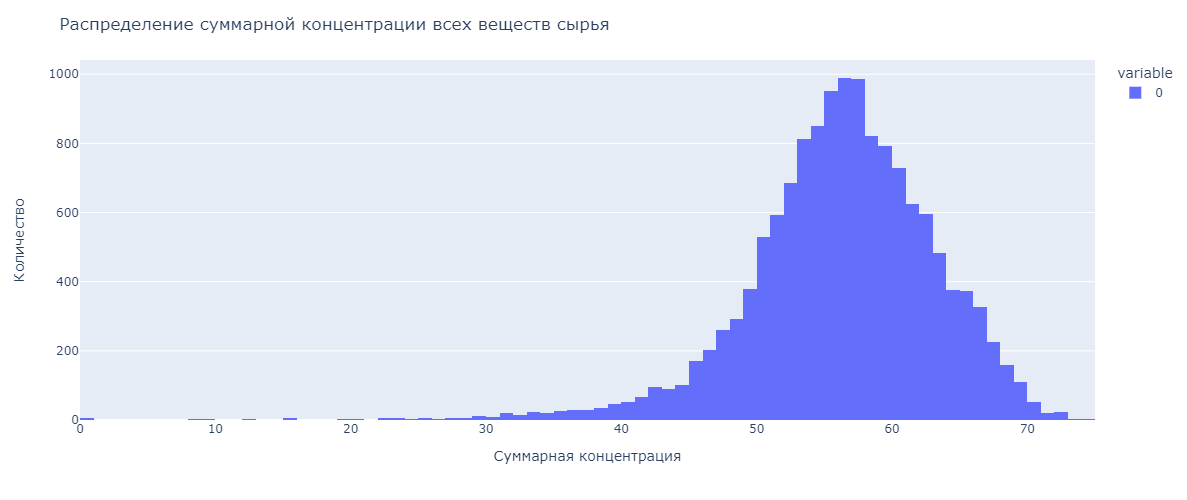

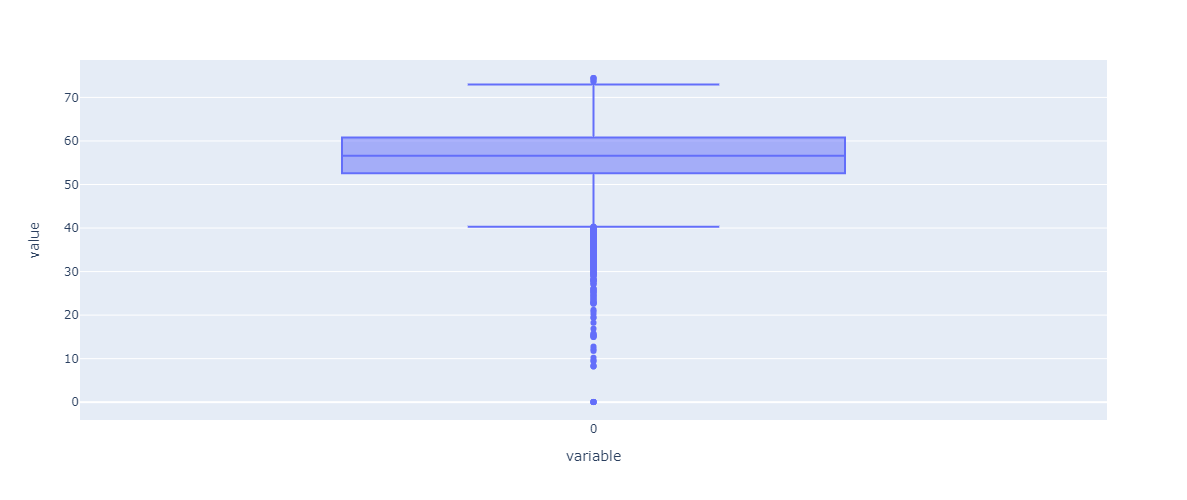

In [27]:
# применим функцию figs
figs(df_train_rougher_input, 'Распределение суммарной концентрации всех веществ сырья')

Видим по графику, что распределение не нормальное и присутствуют выбросы, которые вряд ли понадобятся при обучении модели. Оценим на каждом этапе наличие выбросов и удалим них

In [28]:
# рассмотрим данные через функцию describe
df_train_rougher_input.describe()

count    14149.000000
mean        56.242170
std          7.029808
min          0.040000
25%         52.573579
50%         56.627635
75%         60.763234
max         74.458253
dtype: float64

Теперь построим гистограмму для суммарной концентрации после флотации

In [29]:
# просуммируем значения в отдельный объект
df_train_rougher_output = df_train['rougher.output.concentrate_ag']+ \
df_train['rougher.output.concentrate_pb']+\
df_train['rougher.output.concentrate_au']+\
df_train['rougher.output.concentrate_sol']

In [ ]:
# применим функцию figs
figs(df_train_rougher_output, 'Распределение суммарной концентрации всех веществ после флотации')

In [31]:
# рассмотрим данные через функцию describe
df_train_rougher_output.describe()

count    14149.000000
mean        67.173145
std         12.713129
min          0.000000
25%         64.914390
50%         69.175663
75%         73.429261
max         88.140119
dtype: float64

Построим гистограмму для суммарной концентрации после первой стадии очистки:

In [32]:
# просуммируем значения в отдельный объект
df_train_primary_output = df_train['primary_cleaner.output.concentrate_ag']+ \
df_train['primary_cleaner.output.concentrate_pb']+\
df_train['primary_cleaner.output.concentrate_au']+\
df_train['primary_cleaner.output.concentrate_ag']

In [ ]:
# применим функцию figs
figs(df_train_primary_output, 'Распределение суммарной концентрации всех веществ после первой стадии очистки')

In [34]:
# рассмотрим данные через функцию describe
df_train_primary_output.describe()

count    14149.000000
mean        58.357212
std          9.147930
min          0.000000
25%         58.449867
50%         60.388919
75%         61.775321
max         67.383883
dtype: float64

Построим гистограмму для суммарной концентрации после второй стадии очистки:

In [35]:
# просуммируем значения в отдельный объект
df_train_final = df_train['final.output.concentrate_ag']+ \
df_train['final.output.concentrate_pb']+\
df_train['final.output.concentrate_au']+\
df_train['final.output.concentrate_ag']

In [ ]:
# применим функцию figs
figs(df_train_final, 'Распределение суммарной концентрации всех веществ после второй стадии очистки')

In [37]:
# рассмотрим данные через функцию describe
df_train_final.describe()

count    14149.000000
mean        64.420481
std          6.074157
min          0.000000
25%         64.411730
50%         65.244027
75%         66.113376
max         76.454321
dtype: float64

Из графиков видно, что на разных этапах обработки присутствуют аномальные минимальные значения, хотя в суммарной концентрации исходного сырья таких показателей не было. Обработаем их используя функцию min

In [38]:
# используем функцию min для обработки аномальных значений
df_train_clean = df_train[df_train[['rougher.input.feed_ag','rougher.input.feed_pb','rougher.input.feed_sol','rougher.input.feed_au',
                                   'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au',
                                   'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol',
                                   'primary_cleaner.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol',
                                    'final.output.concentrate_au'
                                   ]].min(axis=1) > 0]

In [39]:
# посмотрим информацию об обработанном датасете
df_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13716 entries, 2016-01-15 00:00:00 to 2017-11-21 03:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         13716 non-null  float64
 1   final.output.concentrate_pb                         13716 non-null  float64
 2   final.output.concentrate_sol                        13716 non-null  float64
 3   final.output.concentrate_au                         13716 non-null  float64
 4   final.output.recovery                               13716 non-null  float64
 5   final.output.tail_ag                                13716 non-null  float64
 6   final.output.tail_pb                                13716 non-null  float64
 7   final.output.tail_sol                               13716 non-null  float64
 8   final.output.tail_au                     

**Выводы** 

После рассмотрения данных суммарной концентрации всех веществ на разных стадиях можно сказать следующее:
- после флотации суммарная концентрация веществ в среднем (с 56,24 до 67,12) увеличивается, что говорит, об очищении сырья от пустой породы.
- после первого этапа очитски суммарная концетрация в среднем уменьшается (с 67,12 до 60,38), что может говорить об очищении руды от пустого флотоконцентрата, других металлов, но при этом увеличивается концентрация золота, что мы видим из предыдущих графиков.
- после второго этапа очистки суммарная концентрация в среднем (с 60,39 до 64,45), что говорит об увеличении характеристик флотоконцентрата в части концентрации золота и очищения его от пустого флотоконцентрата и сопутствующих металлов.
- с каждым этап обработки сырья размах распределения сужался, что говорит о целенаправности производства в части увеличения концетрации в первую очередь золота, что позволит в дальнейшем при использовании методов сорбции и десорбции, гораздо качетсвенее его извлекать.
- также на графиках были заметны нулевые значения суммарных значений концентрации, что возможно может говорить об остановках или перерывах производства при пересменке, ТОиР или вообще отсутствии сырья для обработки на определенных этапах. Обработали эти значения в обучающей выборке, т.к. они могут повлиять на качетсво обучения модели. Было удалено 433 строк.

## Модель

### **Создание функции sMAPE**

Прежде чем мы создадим и обучим модель напишем функцию для вычисления итоговой sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»). Она похожа на MAE, но выражается не в абсолютных величинах, а в относительных и одинаково учитывает масштаб и целевого признака, и предсказания.

In [40]:
# создадим функцию smape_calc с переменными x, y
def smape_calc(x, y):
    # сбросим индексы в x
    x.reset_index(inplace=True, drop = True)
    # переведем y в объект DataFrame
    y = pd.DataFrame(y)
    # вычислим sMAPE для флотоконцетрата
    smape_rougher = (abs(x["rougher.output.recovery"] - y[0])/
                     ((abs(x["rougher.output.recovery"]) + abs(y[0])) / 2) * 100)
    smape_rougher = sum(smape_rougher)/len(x)
    # вычислим sMAPE для финального концентрата
    smape_final = (abs(x["final.output.recovery"] - y[1])/
                     ((abs(x["final.output.recovery"]) + abs(y[1])) / 2) * 100)
    smape_final = sum(smape_final)/len(x)
     
    return (float(0.25*smape_rougher + 0.75*smape_final)) 

Обучим разные модели и оценим их качество кросс-валидацией. Выберим лучшую модель и проверим её на тестовой выборке. Опишим выводы.

### **Обучение моделей**

Разделим обучающую выборку на признаки и целевые признаки и удалим признаки отсутствующие в тесовой выборке

In [45]:
# разделим датасет на features и target при этом удалив
df_train_for_model = df_train_clean[df_test.columns]
target_train = df_train_for_model[['rougher.output.recovery','final.output.recovery']]
features_train = df_train_for_model[df_train_for_model.columns].drop(['final.output.recovery','rougher.output.recovery'], axis=1)

Начнем с метода **линейной регрессии**.

Зададим отдельно функцию для вычисления `sMAPE`, используя `make_scorer`, которая создает отдельный параметр метрики для вычисления и в далее мы его удем использовать для сравнения лучших моделей

In [46]:
# созадим ноую метрику smape
smape = make_scorer(smape_calc, greater_is_better=False )

In [43]:
# Код ревьюера.
features_train.shape

(13716, 52)

In [44]:
# создадим модель линейной регрессии
model_lr = LinearRegression()
# оценим метрику sMAPE путем кросс-валидации с помощью функции cross_validate
cross_valid_results = cross_validate(model_lr, features_train, target_train, cv=4, scoring=smape)
cross_valid_results

(3429,)
(3429,)
(3429,)
(3429,)


{'fit_time': array([0.02551889, 0.21258211, 0.19686818, 0.40548611]),
 'score_time': array([0.1925087 , 0.18806243, 0.10526299, 0.10700917]),
 'test_score': array([-11.64401641,  -7.92615575,  -9.15473529, -11.62084212])}

In [335]:
# выведем среднее значение test_score
print('У модели линейной регрессии sMAPE =','{:.4f}'.format(cross_valid_results['test_score'].mean()))

У модели линейной регрессии sMAPE = -10.0864


Теперь обучим и подберем параметры для модели **дерева решений**

In [336]:
%%time
# обучим модель с деревом решений
dfc = DecisionTreeRegressor(random_state = state)
# пропишем диапазоны параметров для поиска лучших
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 30, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 100, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 100, num = 10)]
param_dist = {'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,}
# определим лучшие параметры через GridSearchCV
model_dt = GridSearchCV(dfc, 
                     param_dist, 
                     cv = 4, 
                     scoring = smape)
# обучим модель на обучающей выборке
model_dt.fit(features_train, target_train)
# отобразим полученные параметры
model_dt.best_params_

CPU times: total: 10min 28s
Wall time: 10min 30s


{'max_depth': 13,
 'max_features': 'sqrt',
 'min_samples_leaf': 67,
 'min_samples_split': 2}

In [337]:
# среднее значение sMAPE по разным выборкам
print('У модели дерева решений sMAPE =','{:.4f}'.format(model_dt.best_score_))

У модели дерева решений sMAPE = -9.3446


И обучим и подберем параметры для модели **случайного леса**

In [338]:
%%time
# обучим модель случаного леса
rfc = RandomForestRegressor(random_state = state)
# определим диапазон гиперпараметров
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 30, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 100, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 100, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}
# определим лучшие параметры с помощью RandomizedSearchCV
model_rf = RandomizedSearchCV(rfc, 
                  param_dist, 
                  cv = 4, 
                  scoring = smape)
# обучим модельна обучающей выборке
model_rf.fit(features_train, target_train)
# отобразим лучшие параметры
model_rf.best_params_

CPU times: total: 10min 29s
Wall time: 10min 32s


{'n_estimators': 780,
 'min_samples_split': 12,
 'min_samples_leaf': 67,
 'max_features': 'sqrt',
 'max_depth': 27,
 'bootstrap': False}

In [339]:
# среднее значение sMAPE по разным выборкам
print('У модели дерева решений sMAPE =','{:.4f}'.format(model_rf.best_score_))

У модели дерева решений sMAPE = -8.7221


Лучшей моделью оказалсь модель **случанойго леса** с sMAPE = -18.4315. Теперь проверим на тестовой выборке модель с подобранными параметрами

In [47]:
# разделим датасет на features и target
target_test = df_test[['rougher.output.recovery','final.output.recovery']]
features_test = df_test[df_test.columns].drop(['final.output.recovery','rougher.output.recovery'], axis=1)

In [48]:
%%time
# обучим модель RF
model_rf = RandomForestRegressor(random_state=state,
                                 n_estimators=780,
                                 max_depth=27,
                                 max_features='sqrt', 
                                 min_samples_split=12,
                                 min_samples_leaf=67)
# обучим модель на тренировочной выборке
model_rf.fit(features_train, target_train)
# посчитаем качество модели на тестовой выборке
predictions_test = model_rf.predict(features_test)
print('У модели случайного дерева на тестовой выборке sMAPE =','{:.4f}'.format(smape_calc(target_test, predictions_test)))

(5290,)
У модели случайного дерева на тестовой выборке sMAPE = 11.4630
CPU times: user 37.8 s, sys: 26.6 ms, total: 37.9 s
Wall time: 37.9 s


Проверим адекватность модели в сравнении с моделью DummyRegressor

In [ ]:
%%time
# используем DummyRegressor для создания модели
dmb = DummyRegressor()
# обучим модель на тренировочной выборке
dmb.fit(features_train, target_train)
# посчитаем качество простого прогноза
cross_valid_results = cross_validate(dmb, features_test, target_test, scoring=smape)
cross_valid_results
smape(dmb, features_test, target_test)

In [406]:
# выведем среднее значение test_score
print('У константной модели sMAPE =','{:.4f}'.format(cross_valid_results['test_score'].mean()))

У константной модели sMAPE = -11.1805


**Выводы** 

В процессе выбора и обучения модели сделали следующее:
- создали отдельную функцию функцию для вычисления итоговой sMAPE. Для обучения моделей и подбора параметров создали отдельную функцию для вычисления sMAPE
- обучили модели **линейной регрессии**, **дерева решений** и **случайного леса**, подобрали параметры и оценили их качество кросс-валидацией в сравнении метрик sMAPE. Лучшей моделью оказалась модель **случайного леса**.
- проверили модели **случайного леса** на тестовой выборке. Показатель sMAPE составил 11,48% у модели **случайного леса**, что означает отклонение предсказаний от целевых признаков составляет в с среднем 11,48%

## **Вывод**

В процессе написания проекта создания модели машинного обучения для производства золота сделано следующее:

- Произведено изучение датасета. 
- Произвели проверку значения показателей эффективности обогащения на обучающей выборке для признака rougher.output.recovery. Сравнив с расчетными данными, получили значение MAE практически равное нулю.
- Проведена предобработка датасета в части заполнения пропусков и перевода столбца с датами и временем в индексы.
- Проведен анализ данных: 
    - изменения концентрации металлов (Au, Ag, Pb) на различных этапах очистки. На каждом этапе обработки концентрация золота увеличивается, что говорит о правильно налаженном процессе обработки. Концентрация серебра в процессе обработки снижается, а концентрация свинца наоборот незначительно повышается после флотации на далее остается на одном уровне.
    - сравнили распределение размеров гранул сырья на обучающей и тестовой выборках. Сделали вывод, что распределение значений размера гранул в обучающей и тестовой выборках отличается незначительно и не должно повлиять на оценку модели.
    - исследовали суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 
    - в процессе анализа использовали гистограммы, диаграммы размаха, диаграммы разброса.
    - удалены аномальные значения в данных концентрации металлов на разных стадиях обработки.
- Данные обучающей и тестовой выборок были разделены на две выборки: обучающую и валидационную. Масштабирование данных не требовалось.
- Создана функция для расчета sMAPE, которая использовалась в качестве основной метрики при выборе параметров моделей  дерева решений и случайного леса
- Обучены и подобраны параметры моделей линейной регрессии, дерева решений и случайного леса. Сравнили метрику sMAPE у моделей. Лучшей оказалась модель линейной регрессии.
- Модели линейной регрессии и случаного леса проверены на тестовой выборке. Получено значение sMAPE у модели случайного леса - 11,48%